## Tarea Análisis Exploratorio de Datos - Leonardo Leal - A01199225

El hundimiento del RMS Titanic en abril de 1912 es uno de los eventos más icónicos del siglo XX. Este barco transportaba a una cantidad de pasajeros bastante extensa para la época, en donde se encontraban distintas clases sociales, edades y nacionalidades. el hundimiento del Titanic no solo marcó la historia, sino que también dejó en evidencia la existencia de profundas desigualdades sociales, ya que las condiciones de viaje y el acceso a los botes salvavidas variaban según la clase y de los pasajeros a bordo.

Analizar este dataset es interesante porque ,e permite explorar cómo los factores como la clase social, el sexo, la edad y el tamaño de la familia influyeron en la probabilidad de sobrevivir. A través del análisis de datos espero descubrir patrones que reflejen el efecto de las decisiones humanas al momento de la evacuación como las estructuras sociales de la época.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Parte 1: Variación

1. ¿Cómo se distribuye el número de familiares a bordo? (variables SibSp y Parch)

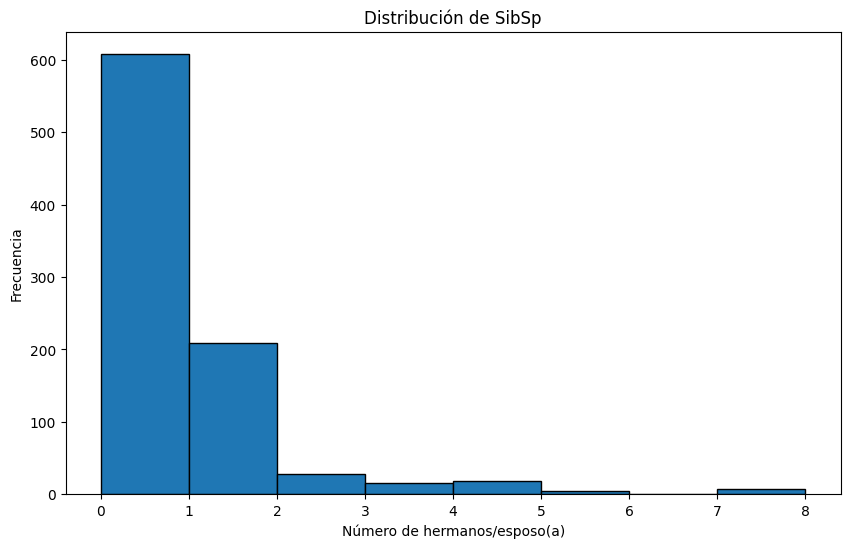

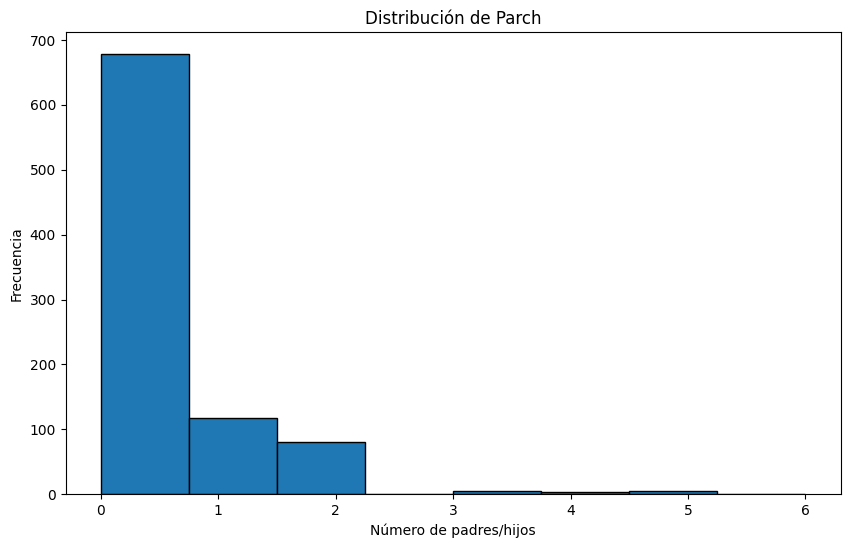

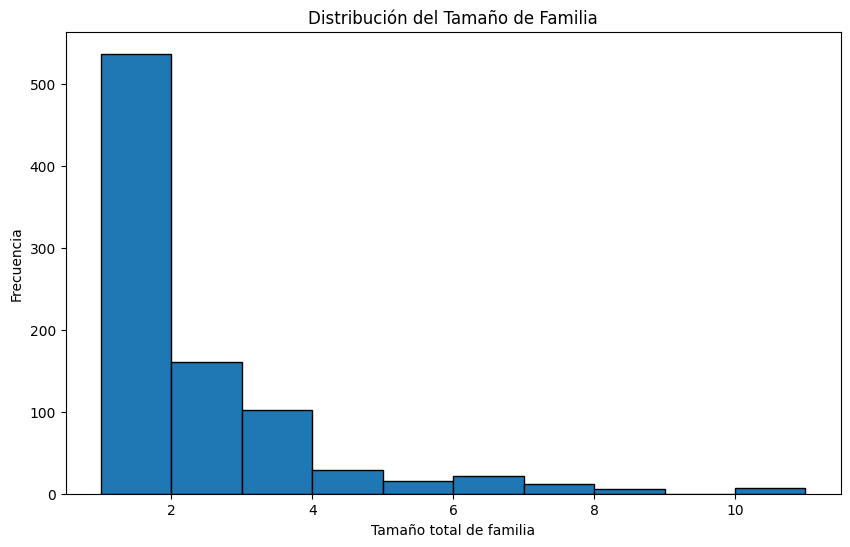

In [4]:
# Distribución de la variable SibSp
plt.figure(figsize=(10,6))
plt.hist(titanic['SibSp'], bins=8, edgecolor='black')
plt.xlabel('Número de hermanos/esposo(a)')
plt.ylabel('Frecuencia')
plt.title('Distribución de SibSp')
plt.show()

# Distribución de la variable Parch
plt.figure(figsize=(10,6))
plt.hist(titanic['Parch'], bins=8, edgecolor='black')
plt.xlabel('Número de padres/hijos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Parch')
plt.show()


# Distribución del tamaño total de familia (SibSp + Parch + 1)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1  # +1 para incluir al propio pasajero
plt.figure(figsize=(10,6))
plt.hist(titanic['FamilySize'], bins=10, edgecolor='black')
plt.xlabel('Tamaño total de familia')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tamaño de Familia')
plt.show()


Observaciones:

Tanto para la variable SibSp como para la variable Parch, es posible observar que existe un valor bastante elevado entre 0 y 1, lo cual indica que la mayor parte de los pasajeros viajaba sin hermanos, cónyuge, padres o hijos, provocando una distribución sesgada a la derecha. Por su parte, existen algunos pasajeros cuyo SibSp es mayor o igual a 5, por lo que hay valores de FamilySize altos, como 8, 9, o incluso más de 10. Estos casos son poco frecuentes y pueden considerarse valores extremos; sin embargo, no parecen errores. Según mi hipótesis sobre el patrón observado, muchos pasajeros probablemente viajaban solos porque el viaje en el Titanic era común para trabajadores y migrantes. Además, el acceso a un viaje era costoso, por lo que tener familias grandes indicaba un gasto elevado.


2. ¿Qué proporcion de los pasajeros eran hombres y qué proporción eran mujeres? (varaible sex)

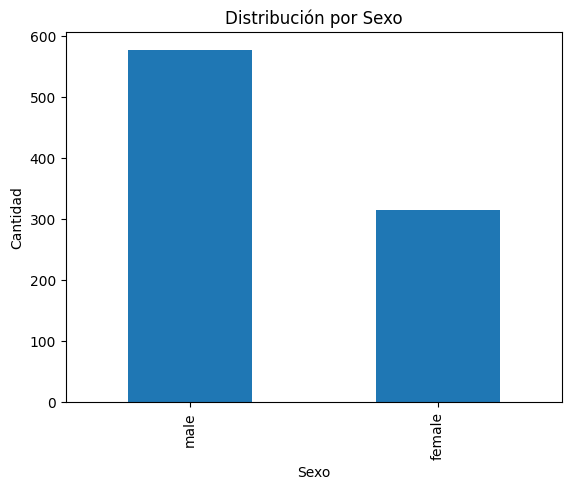

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [5]:
titanic['Sex'].value_counts()

titanic['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Distribución por Sexo')
plt.show()

titanic['Sex'].value_counts(normalize=True)

Observaciones:

Según la distribución por sexo, en el Titanic abordaron 29.52% más hombres que mujeres, por lo que no hay una distribución perfectamente balanceada. Además, no hay outliers porque la variable es categórica. Mi hipótesis para explicar este patrón se basa en que, a principios del siglo XX, era común que los hombres viajaran por trabajo o migración y eran quienes tenían mayor poder adquisitivo. Por otro lado, la mayoría de las mujeres viajaban acompañando a sus familiares.

3. ¿Desde qué puerto embarcó la mayoría? (variable embarked: S = Southampton, C = Cherbourg, Q = Queenstown)

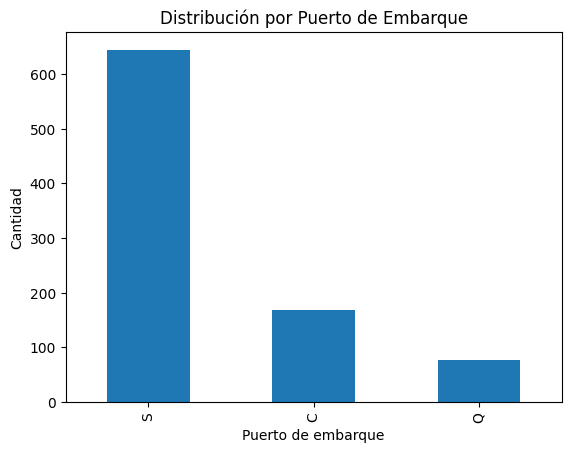

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

In [6]:
titanic['Embarked'].value_counts()
titanic['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Puerto de embarque')
plt.ylabel('Cantidad')
plt.title('Distribución por Puerto de Embarque')
plt.show()
titanic['Embarked'].isnull().sum()
titanic['Embarked'].value_counts(normalize=True)

Observaciones:

Según la distribución por puerto de embarque, existe una clara concentración en el puerto de Southampton, lo cual se confirma cuando se indica que  el 72.44% de los pasajeros abordó en ese puerto. Lo cual, según mi hipótesis, se puede explicar debido a que Southampton era el primer puerto por el que embarcó el Titanic, además, este era un puerto grande e importante en Inglaterra, con mayor volumen comercial y migratorio a diferencia de Cherbourg y Queenstown, lo que naturalmente generaría más pasajeros.


## Parte 2: Covariación 

1. ¿Existe una diferencia en la tasa de supervivencia entre pasajeros mayores de 60 años y el resto de los pasajeros?

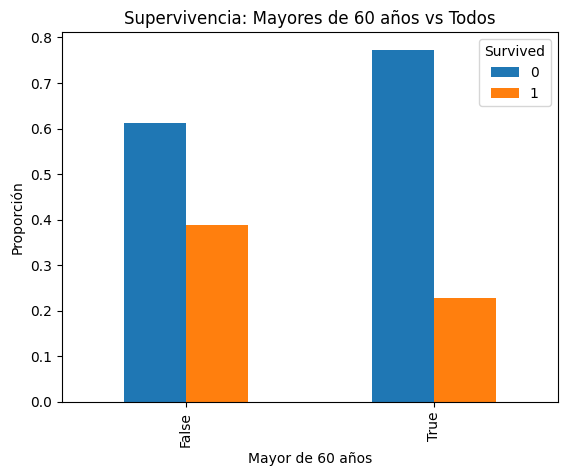

In [7]:
titanic['Mayor60'] = titanic['Age'] > 60 # Nueva variable para indicar si el pasajero es mayor de 60 años
pd.crosstab(titanic['Mayor60'], titanic['Survived'], normalize='index')

tabla = pd.crosstab(titanic['Mayor60'], titanic['Survived'], normalize='index')
tabla.plot(kind='bar')
plt.xlabel('Mayor de 60 años')
plt.ylabel('Proporción')
plt.title('Supervivencia: Mayores de 60 años vs Todos')
plt.show()

Observaciones:

En la gráfica "Supervivencia: Mayores de 60 años vs Todos" se comparan dos grupos: "False", es decir, pasajeros de 60 años o menos, y "True", pasajeros mayores de 60 años. Según los resultados, la proporción de fallecimientos es considerablemente mayor en los pasajeros mayores de 60 años, lo cual se puede explicar como una asociación negativa entre edad avanzada y supervivencia; a mayor edad, menor probabilidad de sobrevivir. Según mi hipótesis, esto sucede debido a que no había suficientes botes para todos los pasajeros; la evacuación fue muy rápida, y se priorizó a las mujeres y niños para la salida. Por lo tanto, los adultos mayores enfrentaban mayor dificultad para moverse entre la multitud, y se les dio menor prioridad.

2. ¿La probabilidad de supervivencia fue menor en hombres comparada con mujeres?

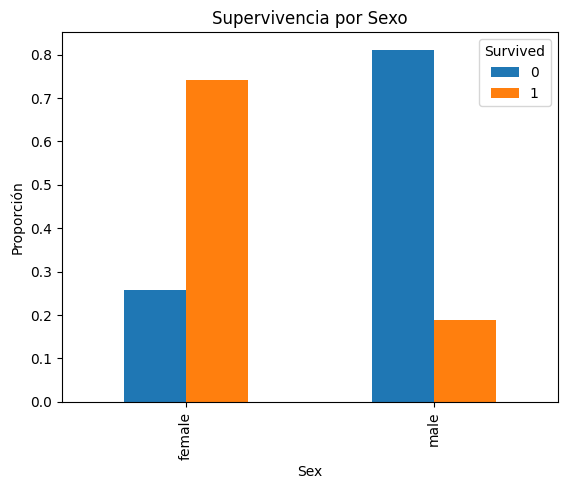

In [8]:
pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')
tabla = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')
tabla.plot(kind='bar')
plt.ylabel('Proporción')
plt.title('Supervivencia por Sexo')
plt.show()

Observaciones: 

La gráfica muestra que la proporción de fallecimiento en hombres es mayor al 80%, mientras que en mujeres es casi del 25%. Lo cual, indica una asociación muy fuerte entre el sexo del pasajero y la probabilidad de su supervivencia, y confirma que la probabilidad de supervivencia era menor en hombres, esto debido a que se dice que se aplicó la normal social de la época "woman and children first". 

3. ¿Existe una asociación entre la clase social del pasajero y el tamaño de su grupo familiar a bordo?

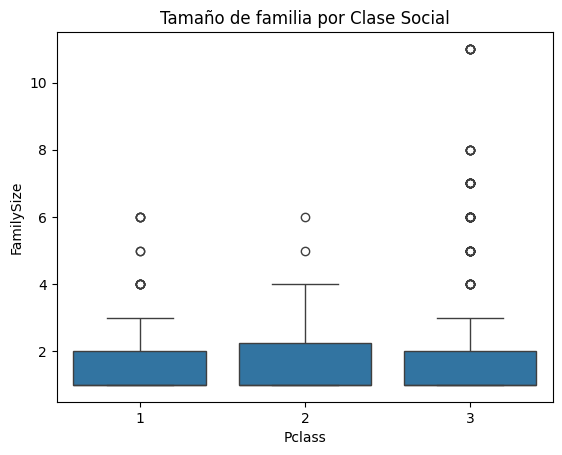

Pclass
1    1.773148
2    1.782609
3    2.008147
Name: FamilySize, dtype: float64

In [9]:
sns.boxplot(data=titanic, x='Pclass', y='FamilySize')
plt.title('Tamaño de familia por Clase Social')
plt.show()
titanic.groupby('Pclass')['FamilySize'].mean()

Según se observa en el diagram de cajas en las tres clases, la mediana del tamaño de familia es baja (cerca de 1 a 2 personas); esto indica que, independientemente de la clase social, la mayoría de los pasajeros viajaba por su cuenta o con pocos acompañantes.  

## Parte 3: Valores Faltantes

<Axes: >

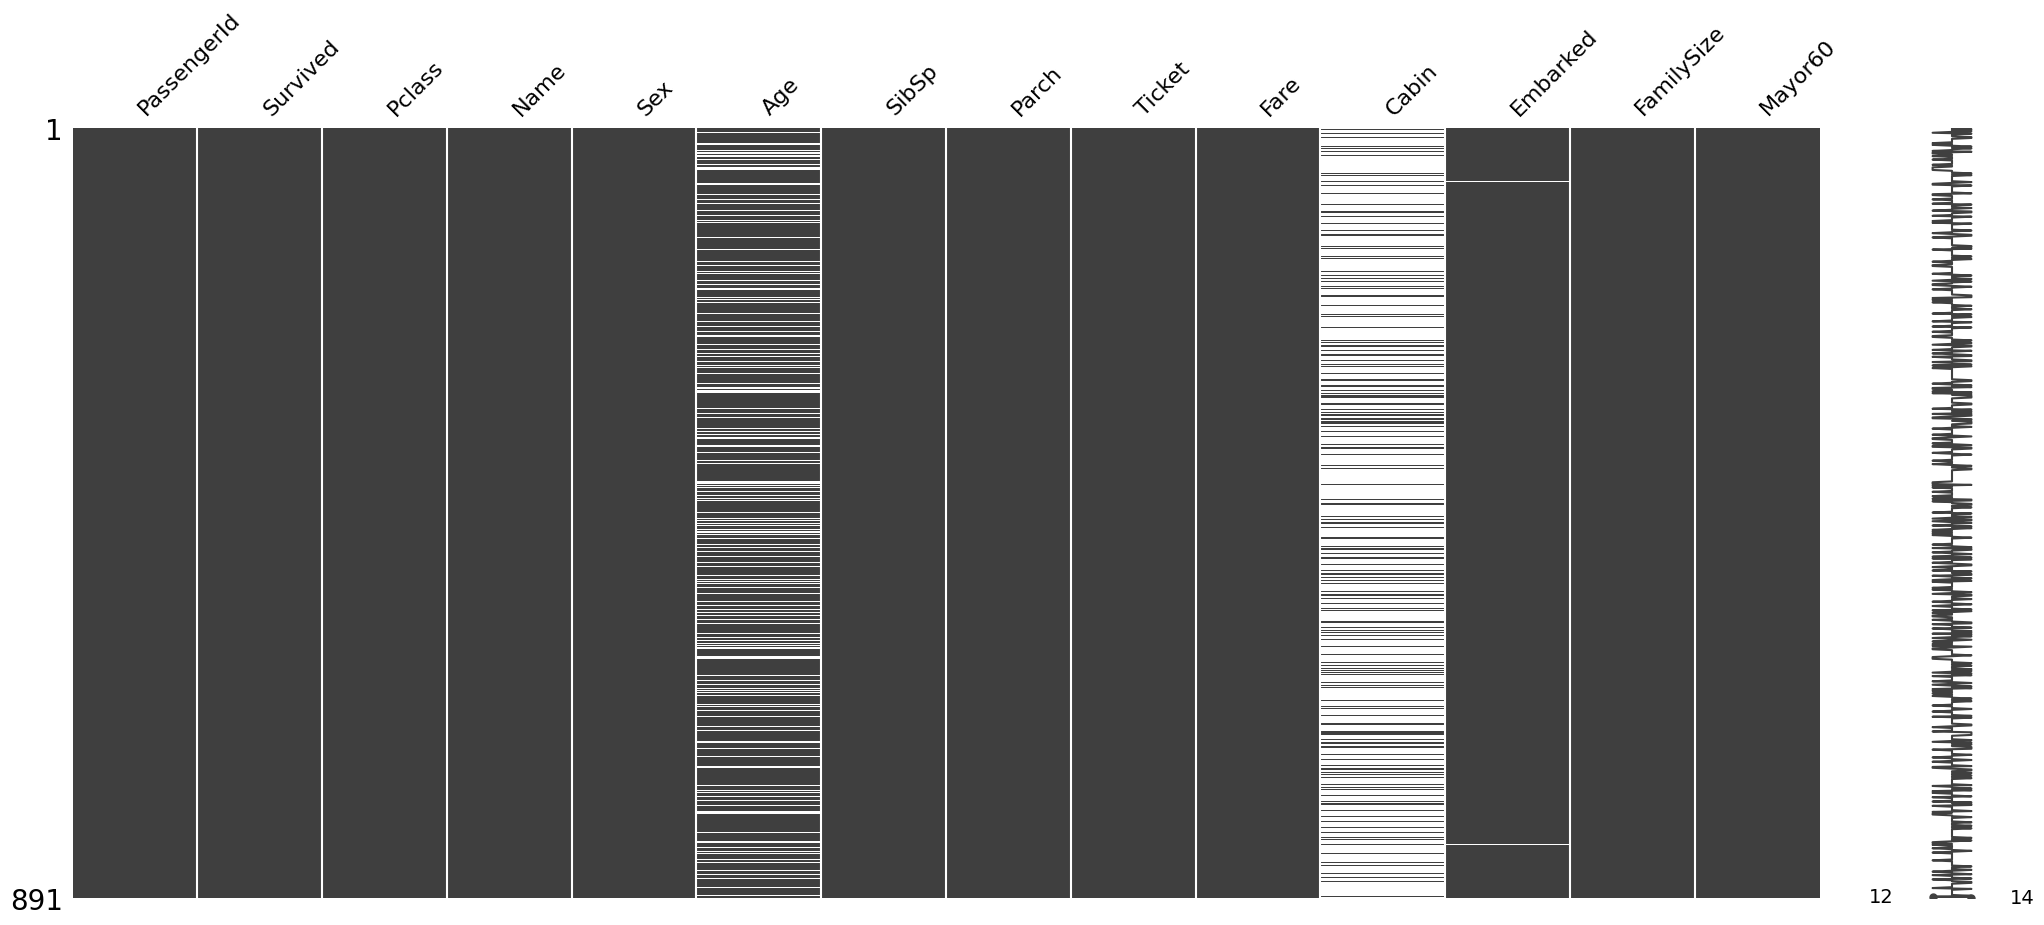

In [10]:
# Inspeccionar valores faltantes
titanic.isnull().sum()

# Visualizar patrón de valores faltantes
import missingno as msno
msno.matrix(titanic)

1. ¿Qué variables tienen valores faltantes?

- La variable edad y cabin son las que en su mayoría presentan valores faltantes, por otra parte, la variable embarked presenta muy pocos valores faltantes

2. ¿Los valores faltantes son aleatorios o siguen un patrón? (ej: ¿la edad faltante está relacionada con la clase del pasajero?)

- No existe ningún patrón específico para ninguna variable. Según mi hipótesis, es probable que no se haya registrado la edad de ciertos pasajeros debido a la gran cantidad de personas que abordaron. Por otra parte, puedo crear la hipótesis de que hacen falta muchos datos en la variable cabin debido a que los pasajeros de clase baja no tenía una cabina asignada formalmente. Para encontrar la causa de la ausencia de datos sería necesario realizar un estudio para encontrar relaciones. 

3. ¿Cómo manejarían estos valores faltantes? Justifiquen su respuesta

- Depende del estudio que se quiera hacer; en el caso de que no necesariamente sea requerida la edad o la cabina en la que se alojaba el psajero, podría omitirse. Por su parte, si es necesario realizar cierto tipo de estudio que no deba ser tan específico, recomendaría reemplazar los valores faltantes; con la mediana en el caso de la variable age y embarked, y convertir la variable cabin a una binaria, en el caso de que el estudio requiera saber si el pasajero estaba (1) o no estaba (0) registrado en una cabina.

## Parte 4: Una Pregunta Propia

¿Cómo varía la tasa de supervivencia dpeendiendo de la clase social y tamaño del grupo familiar del pasajero?

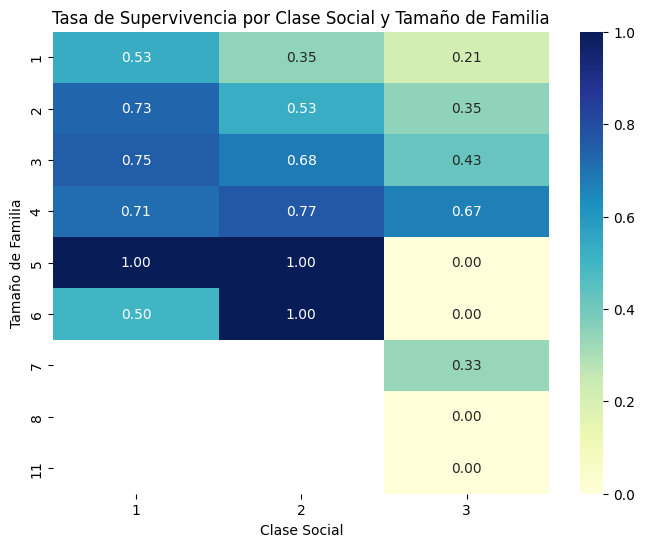

In [13]:
heatmap_data = titanic.pivot_table(values='Survived', index='FamilySize', columns='Pclass', aggfunc='mean')

plt.figure(figsize=(8,6))

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Tasa de Supervivencia por Clase Social y Tamaño de Familia')
plt.xlabel('Clase Social')
plt.ylabel('Tamaño de Familia')

plt.show()



Observando el mapa de calor, se puede llegar a la conclusión de que la supervivencia no dependía únicamente de la clase social ni del tamaño familiar de manera aislada, sino de la interacción entre ambas cosas, es decir, la ventaja que ya se sabía que tenía la primera clase se mantuvo en casi todos los tamaños de grupo, mientras que en tercera clase la supervivencia fue menor, específicamente en grupos grandes. Por lo tanto, se puede llegar a la conclusión de que la desigualdad social influyó incluso en la capacidad de evacuar como grupo o "colectivamente".

## Reflexión Final

Ahora que se concluye este estudio, puedo decir que el reto más significativo durante este trabajo, fue encontrar qué variables nuevas crear a partir de las que ya se tenían, para llegar a un resultado más sofisticado, por ejemplo, en la parte de covariación cuando se trató de encontrar la tasa de supervivencia en adultos mayores, no existitía como tal una variable en la base de datos que etiquetara a cada pasajero diciendo si es mayor de edad o no, por lo que se tuvo que crear la variable mayor 60, con el fin de "acotar" la variable, de manera que fuera más óptima para estudiar. 
Para finalizar, durante este proceso aprendí que la ciencia de datos no solamente se trata de encontrar una relación entre dos tendencias y generar una hipotesis a partir de ello, sino que se trata de encontrar la razzón de por qué una variable tiene cierto patrón a partir del contexto en el que se recabaron los datos. 